In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the Data, we will use Galaxy Data Proxy
print("Loading Telescope Data ...")
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Filter to just two classes to simulate Spiral vs Elliptical
# Class 2 = Bird (Simulating), Class 6 = Frog (simulating elliptical)
class_names = ['Bird (Spiral)', 'Frog (Elliptical)']
mask_train = np.isin(train_labels, [2, 6]).flatten()
mask_test = np.isin(test_labels, [2, 6]).flatten()

X_train, y_train = train_images[mask_train], train_labels[mask_train]
X_test, y_test = test_images[mask_test], test_labels[mask_test]

# Remap labels to 0 and 1
y_train = np.where(y_train == 2, 0, 1)
y_test = np.where(y_test == 2, 0, 1)

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

print(f"Training on {len(X_train)} images.")

Loading Telescope Data ...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 77s 0us/step
Training on 10000 images.


In [7]:
# 2. Build the CNN Architecture
model = models.Sequential([
    # NEW: Explicit Input Layer
    layers.Input(shape=(32, 32, 3)),

    # Layer 1: The Edge Detector (Removed input_shape argument)
    layers.Conv2D(32, (3, 3), activation='relu'), 
    layers.MaxPooling2D((2, 2)),

    # Layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Layer 3
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten
    layers.Flatten(),
    
    # Dense Layers
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [9]:
# 3. Compile and Train
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

print("\nStarting Training (The AI is learning)...")
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


Starting Training (The AI is learning)...
Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.6730 - loss: 0.5864 - val_accuracy: 0.7320 - val_loss: 0.5498
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8022 - loss: 0.4331 - val_accuracy: 0.8425 - val_loss: 0.3640
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8456 - loss: 0.3647 - val_accuracy: 0.8610 - val_loss: 0.3376
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8632 - loss: 0.3325 - val_accuracy: 0.8765 - val_loss: 0.3072
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8789 - loss: 0.2981 - val_accuracy: 0.8815 - val_loss: 0.2956


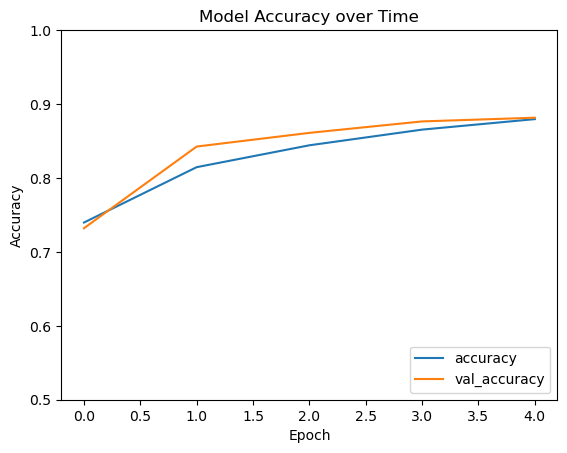


Training Complete. The model can now distinguish between the two types.


In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title("Model Accuracy over Time")
plt.show()

print("\nTraining Complete. The model can now distinguish between the two types.")

## Galaxy 10 DECals dataset.

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models, utils
import numpy as np
import matplotlib.pyplot as plt
from astroNN.datasets import load_galaxy10
from sklearn.model_selection import train_test_split

In [16]:
# STEP 2: LOAD & RESIZE SAFELY
print("Loading Galaxy10 Dataset...")
images, labels = load_galaxy10()

# 1. LIMIT DATA (The Quick Fix)
# To prevent MemoryError, let's take just the first 5,000 galaxies.
# This is plenty for a first test.
limit = 5000
images = images[:limit]
labels = labels[:limit]
print(f"Dataset limited to first {limit} images to save RAM.")

# 2. RESIZE IMAGES
# We shrink them to 64x64. This makes the AI train 10x faster.
print("Resizing images to 64x64...")
# We use TensorFlow's resize function
images_resized = tf.image.resize(images, [64, 64])

# 3. NORMALIZE
# Now we can convert to float32 because the images are small.
images_resized = images_resized.numpy().astype('float32') / 255.0

# 4. Handle Labels
class_names = [
    'Disturbed', 'Merging', 'Round Smooth', 'In-between Smooth', 
    'Cigar Smooth', 'Barred Spiral', 'Unbarred Tight Spiral', 
    'Unbarred Loose Spiral', 'Edge-on without Bulge', 'Edge-on with Bulge'
]

# 5. Split
X_train, X_test, y_train, y_test = train_test_split(images_resized, labels, test_size=0.2)

print(f"Training on {len(X_train)} resized images.")
print(f"New Image Shape: {X_train.shape[1:]}") # Should be (64, 64, 3)

Loading Galaxy10 Dataset...
C:\Users\simas\.astroNN\datasets\Galaxy10_DECals.h5 was found!
Dataset limited to first 5000 images to save RAM.
Resizing images to 64x64...
Training on 4000 resized images.
New Image Shape: (64, 64, 3)


In [17]:
model = models.Sequential([
    # Input Layer (Updated to 64x64)
    layers.Input(shape=(64, 64, 3)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') # 10 Galaxy Types
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Model Built. Ready to train.")

Model Built. Ready to train.


In [13]:
# Compile changes
# We will use the 'Sparse Categorical Crossentropy' because the labels are integers (0,1,2, ...)
# not binary (0,1).
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Model Built. Ready to train.")

Model Built. Ready to train.


Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 24s 70ms/step - accuracy: 0.4180 - loss: 1.1946 - val_accuracy: 0.5880 - val_loss: 0.8916
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - accuracy: 0.6206 - loss: 0.8855 - val_accuracy: 0.6790 - val_loss: 0.8148
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - accuracy: 0.7380 - loss: 0.6943 - val_accuracy: 0.7180 - val_loss: 0.6762
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.7758 - loss: 0.5776 - val_accuracy: 0.7050 - val_loss: 0.7356
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.8009 - loss: 0.5085 - val_accuracy: 0.7880 - val_loss: 0.5691
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.8511 - loss: 0.3961 - val_accuracy: 0.8130 - val_loss: 0.5103
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.8636 - loss: 0.3637 - val_accuracy: 0.7870 - val_loss: 0.5444
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.8758 - loss: 0.3168 - val_acc

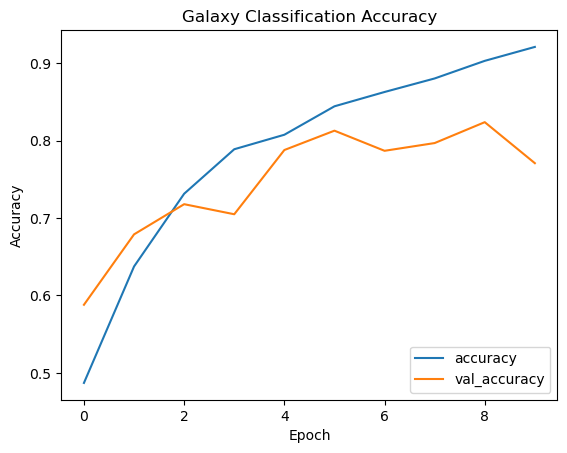

In [18]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Plot Accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title("Galaxy Classification Accuracy")
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


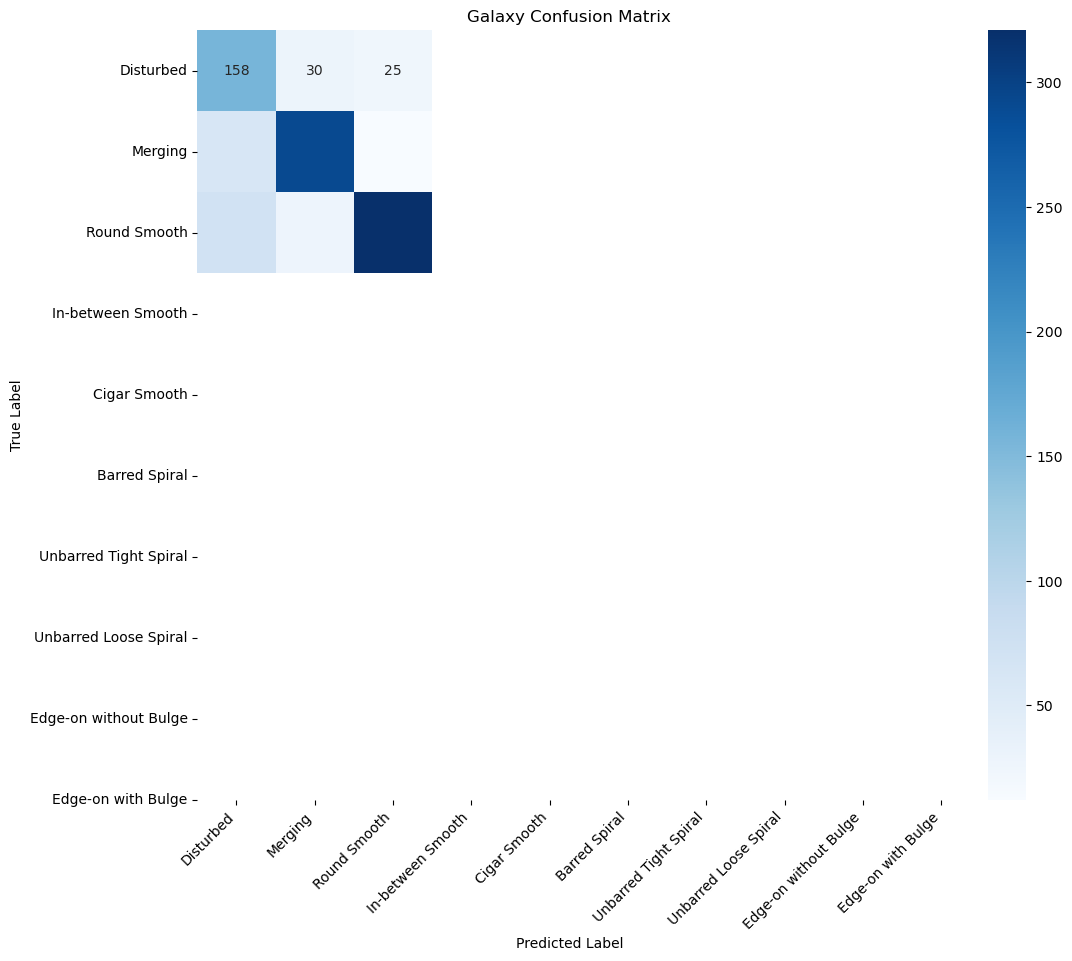

In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. Get Predictions
# The model gives probabilities (e.g., [0.1, 0.8, 0.1...])
predictions_prob = model.predict(X_test)

# We take the highest probability to get the predicted class ID (e.g., 5)
predictions = np.argmax(predictions_prob, axis=1)

# 2. Calculate the Matrix
cm = confusion_matrix(y_test, predictions)

# 3. Plotting
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names)

plt.title('Galaxy Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45, ha='right') # Rotate labels so they don't overlap
plt.show()

In [20]:
from sklearn.utils import shuffle # <--- New Tool

# CORRECTION ADDED | STEP 2: LOAD, SHUFFLE, THEN SLICE
print("Loading Galaxy10 Dataset...")
images, labels = load_galaxy10()

# 1. SHUFFLE FIRST (The Fix)
# This mixes the galaxy types so we don't just get the first 3 categories.
# We shuffle the raw data (uint8) to save memory before conversion.
images, labels = shuffle(images, labels, random_state=42)

# 2. LIMIT DATA
# Now when we take the first 5,000, it's a mix of all types.
limit = 5000
images = images[:limit]
labels = labels[:limit]
print(f"Dataset limited to random {limit} images.")

# 3. RESIZE IMAGES
print("Resizing images to 64x64...")
images_resized = tf.image.resize(images, [64, 64])

# 4. NORMALIZE
images_resized = images_resized.numpy().astype('float32') / 255.0

# 5. Handle Labels & Split
class_names = [
    'Disturbed', 'Merging', 'Round Smooth', 'In-between Smooth', 
    'Cigar Smooth', 'Barred Spiral', 'Unbarred Tight Spiral', 
    'Unbarred Loose Spiral', 'Edge-on without Bulge', 'Edge-on with Bulge'
]

X_train, X_test, y_train, y_test = train_test_split(images_resized, labels, test_size=0.2)

print(f"Training on {len(X_train)} images with mixed categories.")

Loading Galaxy10 Dataset...
C:\Users\simas\.astroNN\datasets\Galaxy10_DECals.h5 was found!
Dataset limited to random 5000 images.
Resizing images to 64x64...
Training on 4000 images with mixed categories.


32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step


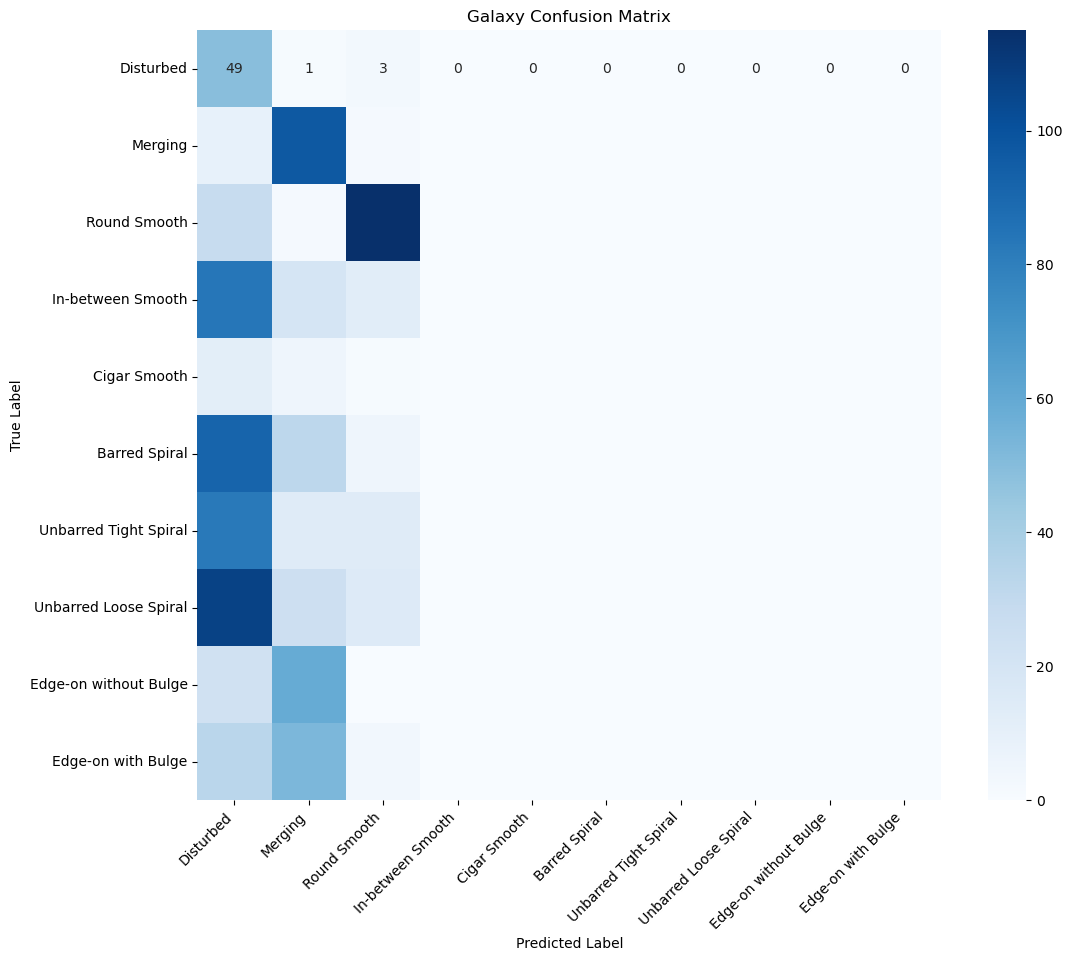

In [21]:
# 1. Get Predictions
# The model gives probabilities (e.g., [0.1, 0.8, 0.1...])
predictions_prob = model.predict(X_test)

# We take the highest probability to get the predicted class ID (e.g., 5)
predictions = np.argmax(predictions_prob, axis=1)

# 2. Calculate the Matrix
cm = confusion_matrix(y_test, predictions)

# 3. Plotting
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names)

plt.title('Galaxy Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45, ha='right') # Rotate labels so they don't overlap
plt.show()